Reading the book and extreacting the names of families of flowers

In [52]:
import nltk
import pandas as pd
from nltk.text import Text
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
with open('8866.txt', 'r') as f:    #reading the book file
    text = f.read()

stop_words = set(stopwords.words('english')) #making a set of stop words
words = word_tokenize(text) #tokenizing the book by words
filtered_words = [word for word in words if word.lower() not in stop_words or word =='in' ]  # removing stopwords from the book except the word 'in' 
filtered_text = ' '.join(filtered_words) #joining the words back together 


sentences = word_tokenize(filtered_text) ##tokenizing the book by words  
t=Text(sentences) #makeing a Text object from the tokenized words 
#print(t.index('WATER-PLANTAIN'))
#print(t.index('COLOR-KEY'))

start = t.index('WATER-PLANTAIN')#getting the index of the first flower family is name
end =t.index('COLOR-KEY')#getting index the first main word after the last family is name

flower_names = [] #making an empty list to hold the names
for sent in sentences[start:end]: #looping form the index of the first to the last family
   if sent.isupper():#checking if the word is in uppercase
     flower_names.append(sent) #adding it to the list 
print(flower_names)
filtered_flowers=' '.join(flower_names)#joining the names together
filtered_flowers=filtered_flowers.split('FAMILY')#removing the word family form the names
#for i in flower_names:
 # if i !='FAMILY' and len(i)>3:
  #  filtered_flowers.append(i)
  #if i =='COMPOSITE':
   # break
    

print(filtered_flowers)
len(filtered_flowers)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['WATER-PLANTAIN', 'FAMILY', 'ARUM', 'FAMILY', 'SPIDERWORT', 'FAMILY', 'PICKEREL-WEED', 'FAMILY', 'LILY', 'FAMILY', 'AMARYLLIS', 'FAMILY', 'IRIS', 'FAMILY', 'ORCHIS', 'FAMILY', 'BUCKWHEAT', 'FAMILY', 'POKEWEED', 'FAMILY', 'PINK', 'FAMILY', 'PURSLANE', 'FAMILY', 'WATER-LILY', 'FAMILY', 'CROWFOOT', 'FAMILY', 'BARBERRY', 'FAMILY', 'POPPY', 'FAMILY', 'FUMITORY', 'FAMILY', 'MUSTARD', 'FAMILY', 'PITCHER-PLANT', 'FAMILY', 'SUNDEW', 'FAMILY', 'SAXIFRAGE', 'FAMILY', 'WITCH-HAZEL', 'FAMILY', 'ROSE', 'FAMILY', 'PULSE', 'FAMILY', 'WOOD-SORREL', 'FAMILY', 'GERANIUM', 'FAMILY', 'MILKWORT', 'FAMILY', 'TOUCH-ME-NOT', 'FAMILY', 'BUCKTHORN', 'FAMILY', 'MALLOW', 'FAMILY', 'ST.', "JOHN'S-WORT", 'FAMILY', 'ROCKROSE', 'FAMILY', 'VIOLET', 'FAMILY', 'EVENING', 'PRIMROSE', 'FAMILY', 'GINSENG', 'FAMILY', 'PARSLEY', 'FAMILY', 'DOGWOOD', 'FAMILY', 'HEATH', 'FAMILY', 'PRIMROSE', 'FAMILY', 'GENTIAN', 'FAMILY', 'DOGBANE', 'FAMILY', 'MILKWEED', 'FAMILY', 'CONVOLVULUS', 'FAMILY', 'POLEMONIUM', 'FAMILY', 'BORAGE', 'FAM

55

# testing another way to remove unwanted words


In [53]:
f_index=[]
for i in flower_names:
  if i !='FAMILY' and len(i)>3:
    f_index.append(i)
  if i =='COMPOSITE':
   break
f_index

['WATER-PLANTAIN',
 'ARUM',
 'SPIDERWORT',
 'PICKEREL-WEED',
 'LILY',
 'AMARYLLIS',
 'IRIS',
 'ORCHIS',
 'BUCKWHEAT',
 'POKEWEED',
 'PINK',
 'PURSLANE',
 'WATER-LILY',
 'CROWFOOT',
 'BARBERRY',
 'POPPY',
 'FUMITORY',
 'MUSTARD',
 'PITCHER-PLANT',
 'SUNDEW',
 'SAXIFRAGE',
 'WITCH-HAZEL',
 'ROSE',
 'PULSE',
 'WOOD-SORREL',
 'GERANIUM',
 'MILKWORT',
 'TOUCH-ME-NOT',
 'BUCKTHORN',
 'MALLOW',
 "JOHN'S-WORT",
 'ROCKROSE',
 'VIOLET',
 'EVENING',
 'PRIMROSE',
 'GINSENG',
 'PARSLEY',
 'DOGWOOD',
 'HEATH',
 'PRIMROSE',
 'GENTIAN',
 'DOGBANE',
 'MILKWEED',
 'CONVOLVULUS',
 'POLEMONIUM',
 'BORAGE',
 'VERVAIN',
 'MINT',
 'NIGHTSHADE',
 'FIGWORT',
 'BROOM-RAPE',
 'MADDER',
 'BLUEBELL',
 'LOBELIA',
 'COMPOSITE']

# Extracting the name of spieces in each family and making a dict from them


In [54]:
f=[]
#looping through sentences and see if the sentence is in the list of families names then adding its index to a new list
for sent in sentences:
   if sent in f_index:
     f.append(t.index(sent))
f.append(t.index('COLOR-KEY'))
f=list(set(f))#removing the duplicates
f.sort()#sorting the list
#looping through the list and removing some unwanted values to make it easy to deal with
try:
  for i in range(len(f)):
    if (f[i+1]-f[i])==1:
      f.pop(i+1)
except IndexError:
  pass
print(f)
my_dict = {}#making an empty dict with families names as keys and there values are empty lists
for key in filtered_flowers:
    my_dict[key] = []
keys = list(my_dict.keys())
list2=[]
#by examining the book it appers that the names of species always starts after the scientific name of the family that always ends with ) or_
# so in these loops we get the index of the words after the said syambols and sorting them
try:
  for i in range(len(f)):
    for sent in range(f[i],f[i+1]):    
      if (sentences[sent]==')' and sentences[sent+1]=='_') or sentences[sent][:-1]=='_':
        list2.append(sent+2)
except IndexError:
  pass
new_list = []
#sorting
for element in list2:
    if element not in new_list:
        new_list.append(element)
for i in range(len(f)):#adjusting the last elemant of the list
  if new_list[-1]<f[i]:
    new_list.append(f[i]+5)
for i in range(len(f)):#making a nested loop to put species to there corresponding family
  try:
    for x in range(new_list[i],new_list[i+1]):
      if sentences[x].isupper():
        break
      my_dict[keys[i]].append(sentences[x])
  except IndexError:
    pass
for key in filtered_flowers:
    values = my_dict[key]
    new_value=' '.join(values)
    new_value=new_value.split(';')
    my_dict[key] = new_value
my_dict


[331, 340, 351, 361, 370, 438, 447, 472, 533, 547, 562, 599, 609, 631, 699, 715, 727, 740, 753, 766, 776, 795, 803, 844, 900, 914, 933, 950, 963, 973, 985, 995, 1006, 1022, 1039, 1049, 1066, 1075, 1164, 1180, 1190, 1202, 1218, 1228, 1241, 1256, 1288, 1308, 1378, 1384, 1401, 1418, 1428, 1538]


{'WATER-PLANTAIN ': ['Broad-leaved Arrow-head'],
 ' ARUM ': ['Jack-in-the-Pulpit ', ' Skunk Cabbage'],
 ' SPIDERWORT ': ['Virginia Common Day-flower'],
 ' PICKEREL-WEED ': ['Pickerel Weed'],
 ' LILY ': ['American White Hellebore ',
  ' Wild Yellow , Meadow , Field Canada Lily ',
  ' Red , Wood , Flame Philadelphia Lily ',
  " Yellow Adder 's Tongue Dog-tooth `` Violet `` ",
  ' Yellow Clintonia ',
  " Wild Spikenard False Solomon 's Seal ",
  " Hairy , True Twin-flowered Solomon 's Seal ",
  ' Early Dwarf Wake-Robin ',
  ' Purple Trillium ',
  ' Ill-scented Wake-Robin Birth-root ',
  ' Carrion flower'],
 ' AMARYLLIS ': ['Yellow Star-grass'],
 ' IRIS ': ['Larger Blue Flag , Blue Iris Fleur-de-lis ',
  ' Blackberry Lily ',
  ' Pointed Blue-eyed Grass , Eye-bright Blue Star'],
 ' ORCHIS ': ["Large Yellow Lady 's Slipper , Whippoorwill 's Shoe Yellow Moccasin Flower ",
  " Moccasin Flower Pink , Venus ' Stemless Lady 's Slipper ",
  ' Showy , Gay Spring Orchis ',
  ' Large , Early Purple-f

# tests that are use to confirm and evaluate the way i used to extract the names of flowers families and the species 

In [ ]:

###
t.index('HEATH')
print(new_list)
print(t.index('HEATH'))
print(sentences[1060:1080])
print(sentences[1074])
print(len(new_list))
print(len(f))
for i in range(len(f)):
  try:
      print(new_list[i],' ',f[i+1])
  except IndexError:
    pass
print(f)
print(new_list)


[338, 347, 358, 368, 377, 445, 454, 479, 540, 554, 569, 606, 616, 638, 706, 722, 734, 747, 760, 773, 783, 802, 810, 851, 907, 921, 940, 957, 970, 980, 992, 1002, 1013, 1030, 1046, 1056, 1073, 1082, 1143, 1171, 1187, 1197, 1209, 1225, 1235, 1248, 1263, 1295, 1315, 1383, 1389, 1406, 1423, 1433, 1543]
1075
['Wild', 'Carrot', 'Queen', 'Anne', "'s", 'Lace', 'DOGWOOD', 'FAMILY', '_', '(', 'Cornaceae', ')', '_', 'Flowering', 'Dogwood', 'HEATH', 'FAMILY', '_', '(', 'Ericaceae']
Dogwood
55
54
338   340
347   351
358   361
368   370
377   438
445   447
454   472
479   533
540   547
554   562
569   599
606   609
616   631
638   699
706   715
722   727
734   740
747   753
760   766
773   776
783   795
802   803
810   844
851   900
907   914
921   933
940   950
957   963
970   973
980   985
992   995
1002   1006
1013   1022
1030   1039
1046   1049
1056   1066
1073   1075
1082   1164
1143   1180
1171   1190
1187   1202
1197   1218
1209   1228
1225   1241
1235   1256
1248   1288
1263   1308
1295   13

In [ ]:
###
l=[]
try:
  for i in range(len(f)):
    for sent in range(f[i],f[i+1]):    
      if (sentences[sent]==')' and sentences[sent+1]=='_') :
        l.append(sentences[sent-1])
except IndexError:
  pass
l

['Alismaceae',
 'Araceae',
 'Commelinaceae',
 'Pontederiaceae',
 'Liliaceae',
 'Amaryllidaceae',
 'Iridaceae',
 'Orchidaceae',
 'Polygonaceae',
 'Phytolaccaceae',
 'Caryophyllaceae',
 'Portulacaceae',
 'Nymphaeaceae',
 'Ranunculaceae',
 'Berberidaceae',
 'Papaveraceae',
 'Fumariaceae',
 'Cruciferae',
 'Sarraceniaceae',
 'Dioseraceae',
 'Saxifragaceae',
 'Hamamelidaceae',
 'Rosaceae',
 'Leguminosae',
 'Oxalidaceae',
 'Geraniaceae',
 'Polygalaceae',
 'Balsaminaceae',
 'Rhamnaceae',
 'Malvaceae',
 'Hypericaceae',
 'Cistaceae',
 'Violaceae',
 'Onagraceae',
 'Araliaceae',
 'Umbelliferae',
 'Cornaceae',
 'Ericaceae',
 'Primulaceae',
 'Gentianaceae',
 'Apocynaceae',
 'Asclepiadaceae',
 'Convolvulaceae',
 'Polemoniaceae',
 'Boraginaceae',
 'Verbenaceae',
 'Labiatae',
 'Solanaceae',
 'Scrophulariaceae']

In [ ]:
###
for i in range(f[2],f[3]):
  print (sentences[i])

SPIDERWORT
FAMILY
_
(
Commelinaceae
)
_
Virginia
Common
Day-flower


In [ ]:

####
my_dict = {}
for key in filtered_flowers:
    my_dict[key] = []
keys = list(my_dict.keys())
for sent in range(f[2],f[3]):
   # print( sentences[sent])
    if sentences[sent]==')' and sentences[sent+1]=='_' :
      x=sent+2
for a in range(x,f[3]):
    my_dict[keys[0]].append(a)
my_dict
    

# making an panda df for familes and species 

In [55]:
types=[]
types2=[]
for key in filtered_flowers:
    types.append(my_dict[key])
for items in range(len(types)):
  x=types[items]
  for item in range(len(x)):
    types2.append(x[item])
df=pd.DataFrame(0,index=filtered_flowers,columns=types2)
df

,Broad-leaved Arrow-head,Jack-in-the-Pulpit,Skunk Cabbage,Virginia Common Day-flower,Pickerel Weed,American White Hellebore,"Wild Yellow , Meadow , Field Canada Lily","Red , Wood , Flame Philadelphia Lily",Yellow Adder 's Tongue Dog-tooth `` Violet ``,Yellow Clintonia,...,Yarrow Milfoil,Dog 's Fetid Camomile Dog-fennel,"Common Daisy , Marguerite , White Daisy",Tansy Bitter Buttons,Thistles,Chicory Succory,Common Dandelion,Tall Wild Lettuce,Orange Tawny Hawkweed Devil 's Paint-brush,
WATER-PLANTAIN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARUM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPIDERWORT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PICKEREL-WEED,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LILY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMARYLLIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IRIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ORCHIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUCKWHEAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
POKEWEED,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
for row in df.index: #looping throgh the df is indexs and columns
    for col in df.columns:
        if row in my_dict: #checking if the names of rows are in the dict and changing the value of the columns that have the same name as there value in the dict to 1
            if col in my_dict[row]:
                df.at[row, col] = 1


In [ ]:
df

,Broad-leaved Arrow-head,Jack-in-the-Pulpit,Skunk Cabbage,Virginia Common Day-flower,Pickerel Weed,American White Hellebore,"Wild Yellow , Meadow , Field Canada Lily","Red , Wood , Flame Philadelphia Lily",Yellow Adder 's Tongue Dog-tooth `` Violet ``,Yellow Clintonia,...,Yarrow Milfoil,Dog 's Fetid Camomile Dog-fennel,"Common Daisy , Marguerite , White Daisy",Tansy Bitter Buttons,Thistles,Chicory Succory,Common Dandelion,Tall Wild Lettuce,Orange Tawny Hawkweed Devil 's Paint-brush,
WATER-PLANTAIN,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARUM,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPIDERWORT,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PICKEREL-WEED,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LILY,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
AMARYLLIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IRIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ORCHIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUCKWHEAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
POKEWEED,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df.sum(axis=1)#gtting the total number of species for each family

WATER-PLANTAIN         1
 ARUM                  2
 SPIDERWORT            1
 PICKEREL-WEED         1
 LILY                 11
 AMARYLLIS             1
 IRIS                  3
 ORCHIS                9
 BUCKWHEAT             1
 POKEWEED              1
 PINK                  5
 PURSLANE              1
 WATER-LILY            2
 CROWFOOT             10
 BARBERRY              2
 POPPY                 2
 FUMITORY              2
 MUSTARD               2
 PITCHER-PLANT         1
 SUNDEW                1
 SAXIFRAGE             3
 WITCH-HAZEL           1
 ROSE                  7
 PULSE                 8
 WOOD-SORREL           2
 GERANIUM              2
 MILKWORT              2
 TOUCH-ME-NOT          1
 BUCKTHORN             1
 MALLOW                1
 ST. JOHN'S-WORT       1
 ROCKROSE              1
 VIOLET                3
 EVENING PRIMROSE      2
 GINSENG               1
 PARSLEY               2
 DOGWOOD               1
 HEATH                 8
 PRIMROSE              4
 GENTIAN               3


In [58]:
df = df.iloc[:-1, :-1]

In [59]:
df

,Broad-leaved Arrow-head,Jack-in-the-Pulpit,Skunk Cabbage,Virginia Common Day-flower,Pickerel Weed,American White Hellebore,"Wild Yellow , Meadow , Field Canada Lily","Red , Wood , Flame Philadelphia Lily",Yellow Adder 's Tongue Dog-tooth `` Violet ``,Yellow Clintonia,...,Sneezeweed Swamp Sunflower,Yarrow Milfoil,Dog 's Fetid Camomile Dog-fennel,"Common Daisy , Marguerite , White Daisy",Tansy Bitter Buttons,Thistles,Chicory Succory,Common Dandelion,Tall Wild Lettuce,Orange Tawny Hawkweed Devil 's Paint-brush
WATER-PLANTAIN,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARUM,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPIDERWORT,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PICKEREL-WEED,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LILY,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
AMARYLLIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IRIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ORCHIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUCKWHEAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
POKEWEED,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
new_df = pd.DataFrame(index=df.index)
new_df['frequency'] = df.sum(axis=1)
new_df # making a df of the total numbers of species par family

,frequency
WATER-PLANTAIN,1
ARUM,2
SPIDERWORT,1
PICKEREL-WEED,1
LILY,11
AMARYLLIS,1
IRIS,3
ORCHIS,9
BUCKWHEAT,1
POKEWEED,1


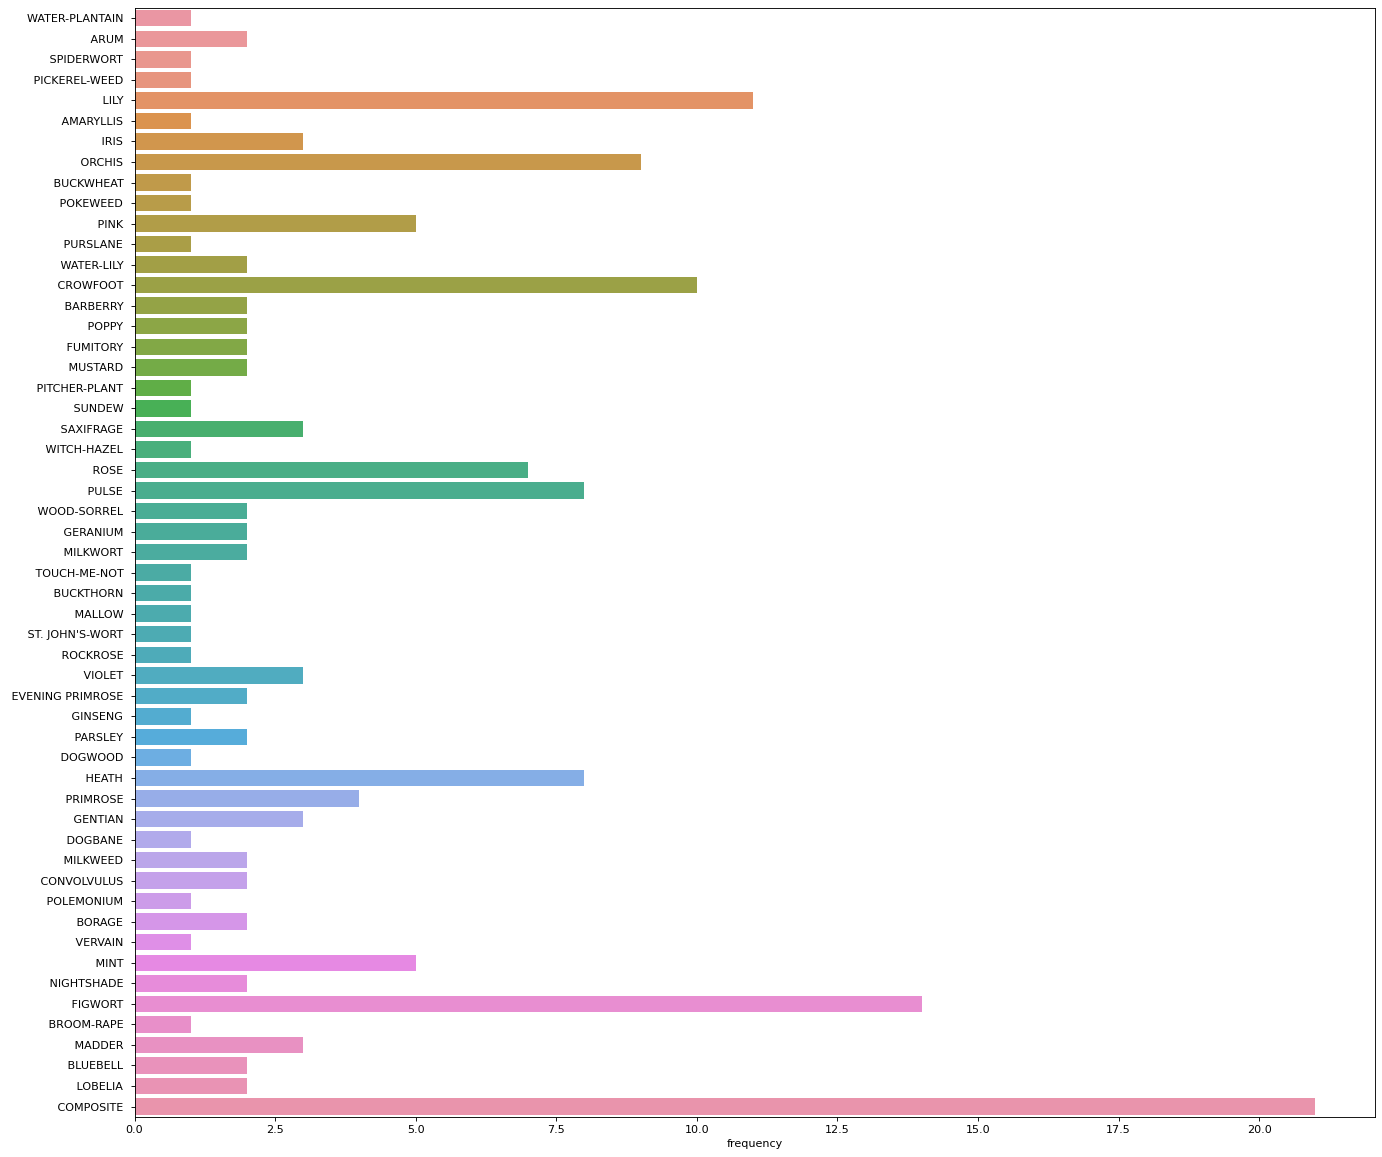

In [61]:
from matplotlib.pyplot import figure
import seaborn as sns
figure(num=None, figsize=(20,18), dpi=80, facecolor='w', edgecolor='r')
sns.barplot(x=new_df['frequency'], y=new_df.index , data =new_df)
plt.show()

In [62]:
l=list(df.columns)
l

['Broad-leaved Arrow-head',
 'Jack-in-the-Pulpit ',
 ' Skunk Cabbage',
 'Virginia Common Day-flower',
 'Pickerel Weed',
 'American White Hellebore ',
 ' Wild Yellow , Meadow , Field Canada Lily ',
 ' Red , Wood , Flame Philadelphia Lily ',
 " Yellow Adder 's Tongue Dog-tooth `` Violet `` ",
 ' Yellow Clintonia ',
 " Wild Spikenard False Solomon 's Seal ",
 " Hairy , True Twin-flowered Solomon 's Seal ",
 ' Early Dwarf Wake-Robin ',
 ' Purple Trillium ',
 ' Ill-scented Wake-Robin Birth-root ',
 ' Carrion flower',
 'Yellow Star-grass',
 'Larger Blue Flag , Blue Iris Fleur-de-lis ',
 ' Blackberry Lily ',
 ' Pointed Blue-eyed Grass , Eye-bright Blue Star',
 "Large Yellow Lady 's Slipper , Whippoorwill 's Shoe Yellow Moccasin Flower ",
 " Moccasin Flower Pink , Venus ' Stemless Lady 's Slipper ",
 ' Showy , Gay Spring Orchis ',
 ' Large , Early Purple-fringed Orchis ',
 ' White-fringed Orchis ',
 ' Yellow-fringed Orchis ',
 ' Calopagon Grass Pink ',
 ' Arethusa Indian Pink ',
 " Nodding Lad

In [63]:
ll=[]#getting the index of the first word after the specie is name and the the last word before the next one is name 
for word in range(len(sentences)):
  try:
    for i in l:
      if sentences[word]==i.split()[0] or (sentences[word]==i.split()[0] and sentences[word+1]==i.split()[1]) :
        ll.append(word)
  except IndexError:
    pass
ll

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 272,
 289,
 338,
 347,
 349,
 358,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 368,
 377,
 377,
 377,
 378,
 378,
 378,
 378,
 378,
 381,
 381,
 381,
 381,
 381,
 381,
 381,
 381,
 381,
 381,
 381,
 381,
 381,
 381,
 382,
 382,
 382,
 382,
 390,
 392,
 392,
 398,
 398,
 398,
 398,
 404,
 407,
 407,
 407,
 407,
 410,
 410,
 410,
 410,
 410,
 410,
 410,
 410,
 410,
 410,
 410,
 410,
 410,
 410,
 411,
 412,
 417,
 417,
 425,
 425,
 429,
 432,
 436,
 445,
 445,
 445,
 445,
 454,
 455,
 455,
 455,
 455,
 455,
 458,
 458,
 458,
 458,
 458,
 462,
 465,
 467,
 470,
 470,
 470,
 470,
 470,
 479,
 479,
 479,
 479,
 480,
 480,
 480,
 480,
 488,
 488,
 488,
 488,
 489,
 492,
 496,
 503,
 506,
 509,
 509,
 509,
 509,
 511,
 511,
 515,
 518,
 521,
 522,
 525,
 526,
 529,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 554,
 569,
 569

In [64]:
ll=list(set(ll))#removing the duplicates and adjusting the range of indexs between  species
ll.sort()
final_list=[]
for i in range(len(ll)):
  try:
    if ll[i]>1530:
      if (ll[i+1]-ll[i])>117:
        final_list.append(ll[i])
  except IndexError:
    pass
print(len(final_list))
final_list

176


[1562,
 1898,
 2579,
 2797,
 3141,
 3504,
 3773,
 4197,
 4427,
 4704,
 4932,
 5145,
 5331,
 5645,
 5807,
 5942,
 6236,
 6448,
 6635,
 6793,
 7103,
 7401,
 7658,
 7898,
 8562,
 8742,
 9092,
 9343,
 9515,
 9704,
 9895,
 10416,
 10696,
 10841,
 11047,
 11242,
 11606,
 11944,
 12158,
 12379,
 12555,
 12868,
 13002,
 13373,
 13924,
 14088,
 14245,
 14544,
 14795,
 14949,
 15103,
 15266,
 15539,
 16114,
 16333,
 16506,
 16730,
 16895,
 17211,
 17547,
 17941,
 18510,
 19061,
 19279,
 19808,
 20200,
 20456,
 20940,
 21205,
 21343,
 21633,
 21835,
 22531,
 22766,
 23173,
 23585,
 23817,
 23942,
 24423,
 24710,
 25213,
 25379,
 25549,
 25729,
 25895,
 26116,
 26338,
 26568,
 26751,
 27029,
 27211,
 27642,
 28429,
 28993,
 29381,
 29533,
 30192,
 31220,
 31657,
 31785,
 31926,
 32080,
 32336,
 32473,
 32633,
 32756,
 33406,
 33646,
 33836,
 34591,
 34756,
 35191,
 35387,
 35554,
 35817,
 36209,
 36407,
 37231,
 37640,
 37980,
 38174,
 38551,
 38684,
 39177,
 39573,
 39869,
 40146,
 40377,
 40701,

In [65]:
length=[]
idk=['tall,high,long']
for i in range(len(final_list)):## looping through words and checking if its ft or not
  try:
    for f in range(final_list[i],final_list[i+1]):
      if sentences[f]=='ft.' and sentences[f+1] in idk: #checking the word after it is from word in the list or not
        length.append(sentences[f-2:f])
        break
      if sentences[f]=='ft.':
        length.append(sentences[f-2:f])
        break
      if 'ft.' not in sentences[final_list[i]:final_list[i+1]]:
        if sentences[f]=='in' and sentences[f+1]=='.':#checking if its in or not
          length.append(sentences[f-2:f+1])
        continue
        if sentences[f]=='long' or sentences[f]=='high'or sentences[f]=='tall':
          length.append(sentences[f-5:f])
  except IndexError:
    pass
print(len(length))
length

170


[['.', '4'],
 ['9', '30', 'in'],
 ['often', '1'],
 [',', '1', 'in'],
 ['3', '5', 'in'],
 ['1', '4'],
 ['2', '8'],
 ['2', '5'],
 ['1', '3'],
 ['1', '2', 'in'],
 ['3', '8', 'in'],
 ['less', '1', 'in'],
 ['6', '15', 'in'],
 ['1', '3'],
 ['.', '3'],
 [',', '1', 'in'],
 ['2', '6', 'in'],
 ['1', '2', 'in'],
 [',', '1/2', 'in'],
 ['1', '1-1/2', 'in'],
 ['8', '16', 'in'],
 [',', '1/2', 'in'],
 ['2', '6', 'in'],
 ['2', '3'],
 ['1-1/2', '4'],
 [';', '1/2', 'in'],
 ['3', '14', 'in'],
 ['1', '2'],
 ['6', '12', 'in'],
 [',', '2', 'in'],
 ['often', '2', 'in'],
 ['6', '8', 'in'],
 ['4', '12', 'in'],
 [',', '1', 'in'],
 ['1', '5'],
 ['1', '2'],
 ['1', '1-1/2'],
 ['1', '2', 'in'],
 ['5', '10', 'in'],
 ['length', '6', 'in'],
 [',', '1', 'in'],
 ['.', '2'],
 ['1', '3'],
 ['4', '10'],
 ['4', '6', 'in'],
 ['1', '3'],
 ['4', '10', 'in'],
 ['1', '2'],
 ['6', '12', 'in'],
 ['3', '7', 'in'],
 ['1-1/2', '3-1/2', 'in'],
 ['3', '8', 'in'],
 ['4', '12', 'in'],
 [',', '1', 'in'],
 ['clusters', '1'],
 [',', '1', 'in

In [66]:
length.pop(-6)

['literally', 'host', 'in']

In [67]:
for word in length:##looping to covert all values from ft to in by multiplying them by 12 
  for num in range(len(word)):
    if not 'in' in word:
      if word[num].isdigit():
        word[num]=eval(word[num])*12
length

[['.', 48],
 ['9', '30', 'in'],
 ['often', 12],
 [',', '1', 'in'],
 ['3', '5', 'in'],
 [12, 48],
 [24, 96],
 [24, 60],
 [12, 36],
 ['1', '2', 'in'],
 ['3', '8', 'in'],
 ['less', '1', 'in'],
 ['6', '15', 'in'],
 [12, 36],
 ['.', 36],
 [',', '1', 'in'],
 ['2', '6', 'in'],
 ['1', '2', 'in'],
 [',', '1/2', 'in'],
 ['1', '1-1/2', 'in'],
 ['8', '16', 'in'],
 [',', '1/2', 'in'],
 ['2', '6', 'in'],
 [24, 36],
 ['1-1/2', 48],
 [';', '1/2', 'in'],
 ['3', '14', 'in'],
 [12, 24],
 ['6', '12', 'in'],
 [',', '2', 'in'],
 ['often', '2', 'in'],
 ['6', '8', 'in'],
 ['4', '12', 'in'],
 [',', '1', 'in'],
 [12, 60],
 [12, 24],
 [12, '1-1/2'],
 ['1', '2', 'in'],
 ['5', '10', 'in'],
 ['length', '6', 'in'],
 [',', '1', 'in'],
 ['.', 24],
 [12, 36],
 [48, 120],
 ['4', '6', 'in'],
 [12, 36],
 ['4', '10', 'in'],
 [12, 24],
 ['6', '12', 'in'],
 ['3', '7', 'in'],
 ['1-1/2', '3-1/2', 'in'],
 ['3', '8', 'in'],
 ['4', '12', 'in'],
 [',', '1', 'in'],
 ['clusters', 12],
 [',', '1', 'in'],
 ['4', '9', 'in'],
 [',', '1'

In [68]:
my_lendict=dict(zip(l,length))
my_lendict

{'Broad-leaved Arrow-head': ['.', 48],
 'Jack-in-the-Pulpit ': ['9', '30', 'in'],
 ' Skunk Cabbage': ['often', 12],
 'Virginia Common Day-flower': [',', '1', 'in'],
 'Pickerel Weed': ['3', '5', 'in'],
 'American White Hellebore ': [12, 48],
 ' Wild Yellow , Meadow , Field Canada Lily ': [24, 96],
 ' Red , Wood , Flame Philadelphia Lily ': [24, 60],
 " Yellow Adder 's Tongue Dog-tooth `` Violet `` ": [12, 36],
 ' Yellow Clintonia ': ['1', '2', 'in'],
 " Wild Spikenard False Solomon 's Seal ": ['3', '8', 'in'],
 " Hairy , True Twin-flowered Solomon 's Seal ": ['less', '1', 'in'],
 ' Early Dwarf Wake-Robin ': ['6', '15', 'in'],
 ' Purple Trillium ': [12, 36],
 ' Ill-scented Wake-Robin Birth-root ': ['.', 36],
 ' Carrion flower': [',', '1', 'in'],
 'Yellow Star-grass': ['2', '6', 'in'],
 'Larger Blue Flag , Blue Iris Fleur-de-lis ': ['1', '2', 'in'],
 ' Blackberry Lily ': [',', '1/2', 'in'],
 ' Pointed Blue-eyed Grass , Eye-bright Blue Star': ['1', '1-1/2', 'in'],
 "Large Yellow Lady 's Sl

In [69]:
lendf=pd.DataFrame(index=l)
shortest=[]##list for the longest the speices can be
longest=[]#list for the longest the speices can be
for high in range(len(length)):#geting the shortest valuse by slicing through the list of values and getting the first value if its digit 
  if str(length[high][0]).isdigit():
     shortest.append(length[high][0])
  else:
     shortest.append(length[high][1])
for high in range(len(length)): #geting the shortest valuse by slicing through the list of values and getting the first value
     longest.append(length[high][1])
for i in range(len(l)-len(shortest)):#giving the values that are not initalized in the book 0
  shortest.append(0)
  longest.append(0)

In [70]:
for i in range(len(shortest)): #converting types of items from str to int or float to be able to visualize them
  if type(shortest[i])==str:
    shortest[i]=eval(shortest[i])
for i in range(len(longest)):
  if type(longest[i])==str:
    longest[i]=eval(longest[i])
lendf['shortest']=shortest
lendf['longest']=longest
lendf
for i in longest:
   print(type(i))
    

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'float'>
<class 'int'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'int'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<cla

<Figure size 1600x1440 with 0 Axes>

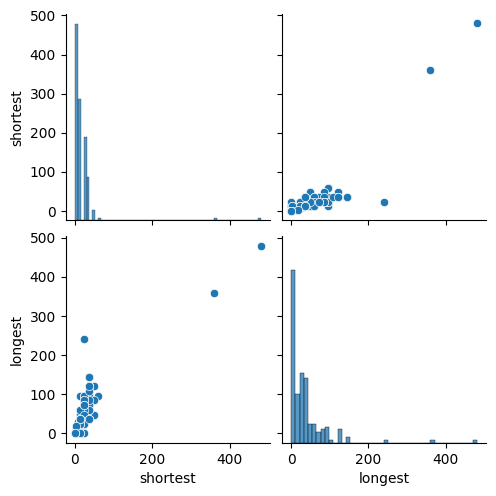

In [71]:
figure(num=None, figsize=(20,18), dpi=80, facecolor='w', edgecolor='r')
sns.pairplot(data=lendf)
plt.show()

In [72]:
lendf.iloc[79,0]=4  #fixing some values
lendf.iloc[79,1]=9
lendf.iloc[113,0]=12
lendf.iloc[113,1]=48

In [73]:
average=[] #getting the average len of species and adding it to the df
for i in range(len(shortest)):
  average.append((shortest[i]+longest[i])/2)
lendf['average']=average 

In [74]:
lendf.head()

,shortest,longest,average
Broad-leaved Arrow-head,48.0,48.0,48.0
Jack-in-the-Pulpit,9.0,30.0,19.5
Skunk Cabbage,12.0,12.0,12.0
Virginia Common Day-flower,1.0,1.0,1.0
Pickerel Weed,3.0,5.0,4.0


In [75]:
lendf2=lendf.iloc[:-3,:]

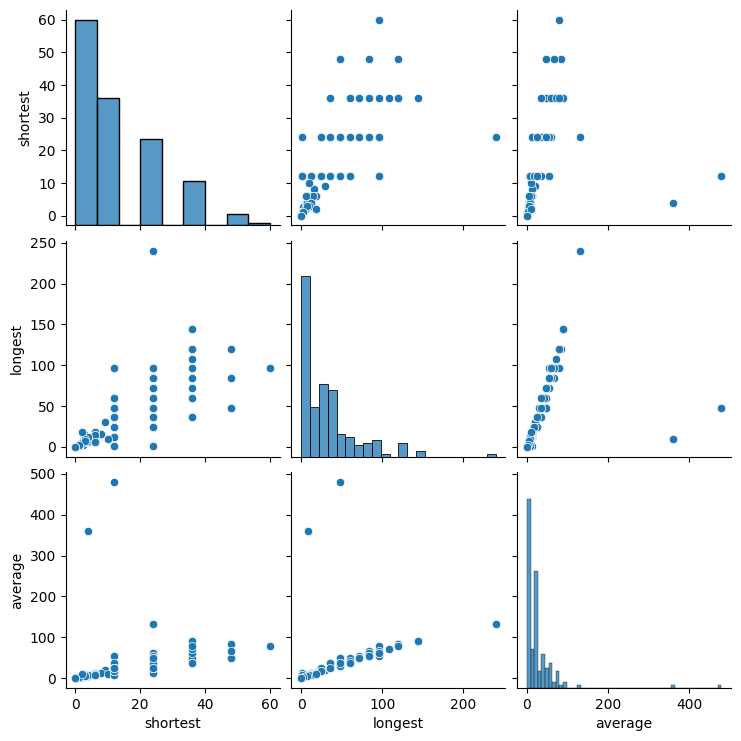

In [76]:
sns.pairplot(data=lendf)


# Getting the color of each flower

In [77]:
import webcolors
colors=[]

for i in range(len(final_list)):
  try:
    for f in range(final_list[i],final_list[i+1]):
      if sentences[f].lower() in webcolors.CSS3_NAMES_TO_HEX:
        colors.append(sentences[f])
        break
  except IndexError:
    pass
len(colors)

172

In [78]:
my_colordict=dict(zip(l,colors))
my_colordict

{'Broad-leaved Arrow-head': 'White',
 'Jack-in-the-Pulpit ': 'yellow',
 ' Skunk Cabbage': 'Purple',
 'Virginia Common Day-flower': 'green',
 'Pickerel Weed': 'blue',
 'American White Hellebore ': 'green',
 ' Wild Yellow , Meadow , Field Canada Lily ': 'Yellow',
 ' Red , Wood , Flame Philadelphia Lily ': 'orange',
 " Yellow Adder 's Tongue Dog-tooth `` Violet `` ": 'Violet',
 ' Yellow Clintonia ': 'Yellow',
 " Wild Spikenard False Solomon 's Seal ": 'White',
 " Hairy , True Twin-flowered Solomon 's Seal ": 'green',
 ' Early Dwarf Wake-Robin ': 'white',
 ' Purple Trillium ': 'white',
 ' Ill-scented Wake-Robin Birth-root ': 'purple',
 ' Carrion flower': 'Purple',
 'Yellow Star-grass': 'Purple',
 'Larger Blue Flag , Blue Iris Fleur-de-lis ': 'Yellow',
 ' Blackberry Lily ': 'Blue',
 ' Pointed Blue-eyed Grass , Eye-bright Blue Star': 'blue',
 "Large Yellow Lady 's Slipper , Whippoorwill 's Shoe Yellow Moccasin Flower ": 'orange',
 " Moccasin Flower Pink , Venus ' Stemless Lady 's Slipper ": 

In [79]:
for color in range(len(colors)):
  colors[color]=colors[color].lower()
colordf=pd.DataFrame(index=l)
colordf['color']=colors
colordf


,color
Broad-leaved Arrow-head,white
Jack-in-the-Pulpit,yellow
Skunk Cabbage,purple
Virginia Common Day-flower,green
Pickerel Weed,blue
...,...
Thistles,violet
Chicory Succory,wheat
Common Dandelion,yellow
Tall Wild Lettuce,white


In [80]:
ccount=colordf.value_counts()
y=list(colordf.value_counts())
y

[44, 31, 19, 18, 17, 9, 8, 5, 4, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]

In [81]:
ccount_names=[]
for r in ccount.index:
  for x in r:
    ccount_names.append(x)
ccount_names

['white',
 'yellow',
 'blue',
 'pink',
 'purple',
 'green',
 'red',
 'violet',
 'orange',
 'magenta',
 'brown',
 'salmon',
 'silver',
 'moccasin',
 'orchid',
 'gold',
 'lavender',
 'gray',
 'wheat',
 'chocolate',
 'crimson']

In [ ]:
type(ccount_names[0])

str

In [82]:
ccount=pd.DataFrame(index=ccount_names)
ccount['counts']=y
ccount

,counts
white,44
yellow,31
blue,19
pink,18
purple,17
green,9
red,8
violet,5
orange,4
magenta,3


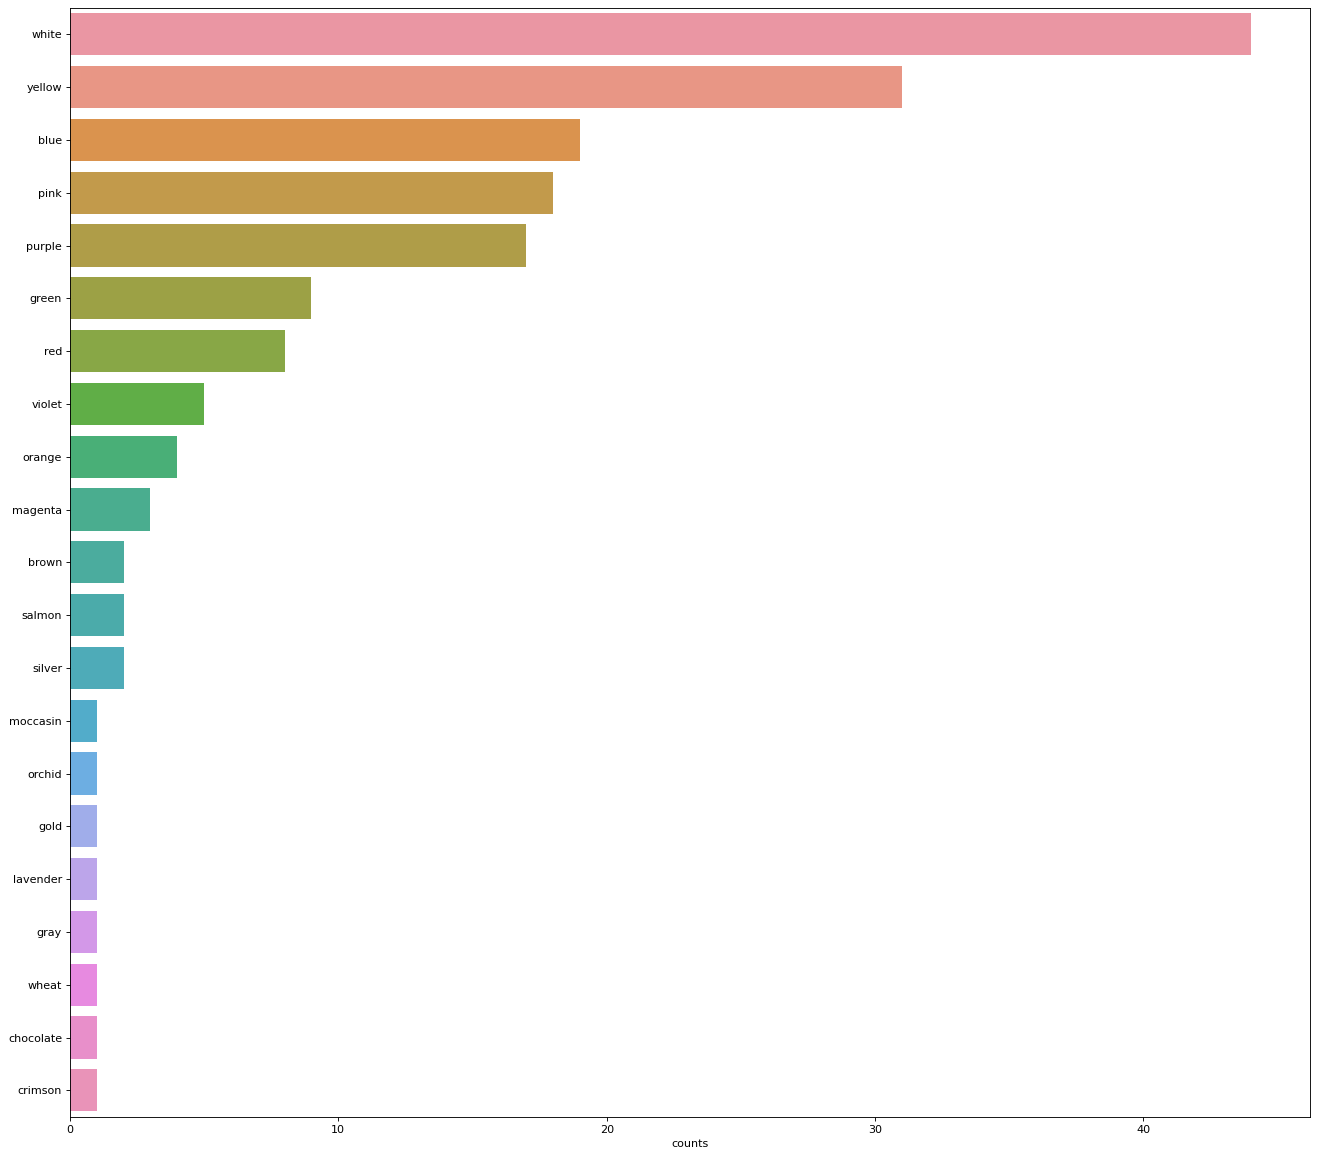

In [83]:
figure(num=None, figsize=(20,18), dpi=80, facecolor='w', edgecolor='r')
sns.barplot(x=ccount['counts'], y=ccount.index , data =ccount)
plt.show()

# getting the flowering season of each flower

In [84]:
date=[]
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i in range(len(final_list)):
  try:
    for f in range(final_list[i],final_list[i+1]):
      if sentences[f]== 'Season_':
         date.append(sentences[f+2])         
  except IndexError:
    pass
print(len(date))
date
for i in range(len(date)):
  x=date[i].split('-')
  if x[0] not in months:
    date[i]='all'
date

160


['July-September',
 'April-June',
 'February-April',
 'June-September',
 'June-October',
 'May-July',
 'June-July',
 'June-July',
 'March-May',
 'May-June',
 'May-July',
 'April-June',
 'March-May',
 'April-June',
 'April-June',
 'May-October',
 'May-July',
 'June-July',
 'May-August',
 'May-July',
 'May-June',
 'April-June',
 'June-August',
 'July-August',
 'June-July',
 'May-June',
 'July-October',
 'July-October',
 'June-October',
 'all',
 'July-September',
 'June-August',
 'April-June',
 'June-September',
 'March-May',
 'April-September',
 'May-September',
 'July-September',
 'December-May',
 'April-June',
 'July-September',
 'April-June',
 'May-August',
 'April-July',
 'June-August',
 'April-June',
 'May',
 'May-June',
 'April-May',
 'April-September',
 'April-May',
 'May-June',
 'all',
 'June-November',
 'May-June',
 'July-August',
 'March-May',
 'April-May',
 'July-September',
 'July-September',
 'June-August',
 'May',
 'April-August',
 'May-June',
 'June-August',
 'July-August'

In [85]:
flowers=pd.concat([colordf,lendf,] ,axis=1)
flowers.head()

,color,shortest,longest,average
Broad-leaved Arrow-head,white,48.0,48.0,48.0
Jack-in-the-Pulpit,yellow,9.0,30.0,19.5
Skunk Cabbage,purple,12.0,12.0,12.0
Virginia Common Day-flower,green,1.0,1.0,1.0
Pickerel Weed,blue,3.0,5.0,4.0


# the layout and activation functions 

In [86]:
def menu():
  print('\n\t\t\t\t\t Flowers Families\n')
  for i in range(len(filtered_flowers)):
    try:
      if i+1==55:
        print(i+1,'-Facts')
        break
      print(i+1,'-',filtered_flowers[i])
    except IndexError:
      pass
def choose():
  x=input('\nChoose the family you want to know about ')
  if str(x).isdigit():
    return int(x)
  print('\nPlease Enter the Number of the the family')
  choose()
def choose_flower(a):
  x=input('\nChoose the flower you want to know about ')
  if int(x)<=len(a):
    if str(x).isdigit():
      return int(x)
    print('\nPlease Enter the Number of the the flower')
  print('\nPlease Enter a Valid Number of the the flower')
  choose_flower(a)
def types_flo(x):
  for i in range(len(x)):
    if i+1>len(x):
      break
    print(i+1,'-',x[i])
def get_info():
  ln()
  max_index = lendf['longest'].idxmax()
  max_value = lendf.loc[max_index, 'longest']
  print('\nThe tallest Flowers : ',max_index,' with',max_value,'in. long')
  min_index = lendf2['shortest'].idxmin()
  min_value = lendf2.loc[min_index, 'shortest']
  print('\nThe shortest Flowers : ',min_index,' with',min_value,'in. long')
  max_index = ccount['counts'].idxmax()
  max_value = ccount.loc[max_index, 'counts']
  print('\nThe Most Comman Color : ',max_index,' With Total :',max_value)
  names=[] 
  for row in range(len(ccount.index)):
    if ccount.iloc[row,0] ==1:
      names.append(ccount.index[row])

  print('\nThe Rarest Colors : ',names,' With Each repeated only once')
  ln()
def ln(): #method to print ------ for a good layout
  for i in range(200):
    print("-",end="")
  



In [88]:
def start():
  start=True
  ln()
  menu()
  ln()
  while start:
    n=choose()
    if n!=55:
      x=filtered_flowers[n-1]
      print('\n\t\t\t','The Flowers in ',x,'Family')
      ln()
      print('\n')
      ty=list(df.columns[df.loc[x]==1])
      types_flo(ty)
      print('\n\t\t\tTotal =',df.loc[x].sum())
      ln()
      y=ty[(choose_flower(ty)-1)]
      print(flowers.loc[y])
      ln()
    else:
      get_info()
    con=input("\nDo You Want TO Play Again : (yes or no)")
    if(con=='yes'or con=='y'):
      continue
    else:
      start=False
      break  







In [ ]:
start()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
					 Flowers Families

1 - WATER-PLANTAIN 
2 -  ARUM 
3 -  SPIDERWORT 
4 -  PICKEREL-WEED 
5 -  LILY 
6 -  AMARYLLIS 
7 -  IRIS 
8 -  ORCHIS 
9 -  BUCKWHEAT 
10 -  POKEWEED 
11 -  PINK 
12 -  PURSLANE 
13 -  WATER-LILY 
14 -  CROWFOOT 
15 -  BARBERRY 
16 -  POPPY 
17 -  FUMITORY 
18 -  MUSTARD 
19 -  PITCHER-PLANT 
20 -  SUNDEW 
21 -  SAXIFRAGE 
22 -  WITCH-HAZEL 
23 -  ROSE 
24 -  PULSE 
25 -  WOOD-SORREL 
26 -  GERANIUM 
27 -  MILKWORT 
28 -  TOUCH-ME-NOT 
29 -  BUCKTHORN 
30 -  MALLOW 
31 -  ST. JOHN'S-WORT 
32 -  ROCKROSE 
33 -  VIOLET 
34 -  EVENING PRIMROSE 
35 -  GINSENG 
36 -  PARSLEY 
37 -  DOGWOOD 
38 -  HEATH 
39 -  PRIMROSE 
40 -  GENTIAN 
41 -  DOGBANE 
42 -  MILKWEED 
43 -  CONVOLVULUS 
44 -  POLEMONIUM 
45 -  BORAGE 
46 -  VERVAIN 
47 -  MINT 
48 -  NIGHTSHADE 
49 -  FIGWO